# 활성화 함수 개념

예를 들어, 알로에 음료와 오렌지 음료를 분류하기 위해 그것들의 특징들을 데이터화 시켰다고 가정했을 때, 수많은 특징들로 이 둘을 정의하고 학습하여 분류하는 것을 만들려 하는데 데이터를 연산하다 보니 튀는 데이터가 있을 수 있고, 필요 없는 데이터가 존재할 수도 있는 것이다

```활성화 함수```는 수많은 레이어로 이루어진 층에서 연산이 이루어질 때 어떻게 될지는 아무도 알 수 없기 때문에 활성화 함수라는 함수를 만들어서 ```데이터의 폭을 어느정도 정의할 수 있게 해주는 것이다```

# 계단 함수

최초로 사용한 활성화 함수가 바로 계단 함수다.

```0 혹은 1로만 이루어진 것이 계단함수이며, 0 이상이면 1, 0 미만이면 0인 활성화 함수다.```


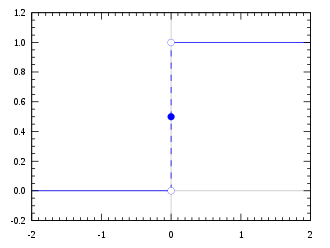





계단함수는 데이터가 극적으로 변하는 모양새이기 때문에 데이터의 손실이 일어날 가능성이 있어 딥러닝에서는 사용되지 않는다

아래는 파이썬으로 구현한 계단함수의 개념이다

In [ ]:
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
import numpy as np

def step_function2(x):
  y = x > 0
  return y.astype(np.int)

In [ ]:
# x라는 넘파이 배열을 준ㅂ니하고 그 넘파이 배열에 부등호 연산을 수행한다
x = np.array([-1.0, 1.0, 2.0])
print(x)
y = x > 0
print(y)
# 넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열이 생성된다

[-1.  1.  2.]
[False  True  True]


In [ ]:
# y를 계단 함수처럼 0이나 1의 int형을 출력하는 함수로 만들어 본다
y = y.astype(np.int)
print(y)
# 넘파이 배열의 자료형을 변환할 때는 astype() 메소드를 이용한다. 원하는 자료형을 인수로 지정하면 되는 것이다.

> 계단 함수 그래프

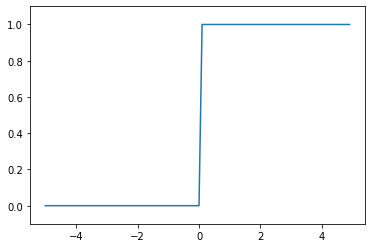

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def step_function3(x):
  return np.array(x > 0, dtype=np.int64)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function3(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

# 시그모이드 함수

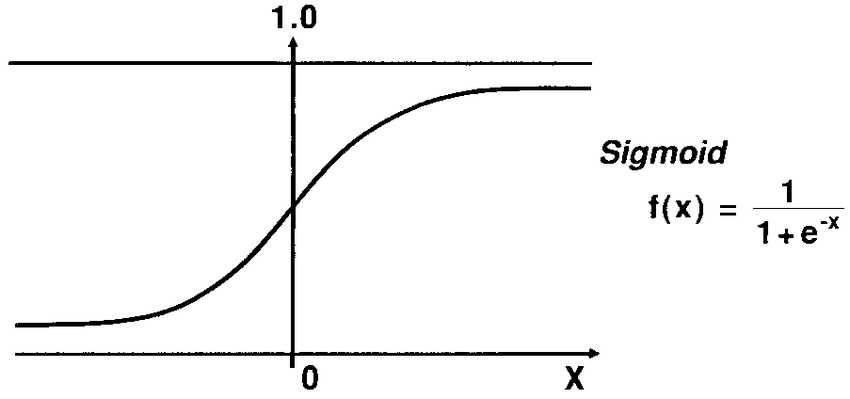

시그모이드 함수는 계단함수의 단점인 미세한 값을 생성할 수 있게 나온 함수이다. 계단함수가 0과 1로만 된 함수라면 시그모이드는 0과 1사이의 실수로 이루어진 함수이기 때문에 0.237 등과 같이 정교한 수를 전달할 수 있다.

> 단점

딥러닝은 기울기를 통해 값을 찾아나가는 데 시그모이드 함수는 층이 많아지면 점점 값이 0에 수렴되는 문제가 발생하여 성능이 떨어짐

In [ ]:
# 시그모이드 함수 구현
def sigmoid(x):
  return 1 / (1 + np.exp(-x)) # exp는 자연상수를 지수함수로 변환해준다

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])



> `잠시 짚고 넘어가는 넘파이의 브로드캐스트 기능`



브로드캐스트 기능이란 `넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행`하는 것이다

In [ ]:
# 브로드캐스트 복습 겸 구체적인 예
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


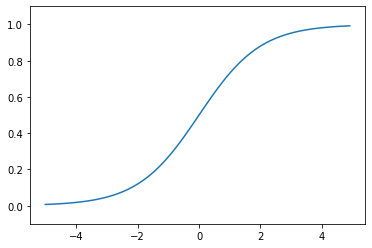

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# 시그모이드 함수와 계단 함수 비교

> 차이 1

`매끄러움의 차이`. 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다. 한편, 계단 함수는 0을 경계로 갑자기 바뀌어버린다. 시그모이드의 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다

> 차이 2

계단 함수가 0과 1 중 하나의 값만 돌려주는 반면 `시그모이드 함수는 실수를 돌려준다`는 점도 다르다. 다시 말해 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐릅니다.

계단 함수는 시시오도시처럼 물을 쏟아내거나 쏟아내지 않는(0 또는 1) 두 가지 움직임을 보여주며, 시그모이드 함수는 물레방아처럼 흘러온 물의 양에 비례해 흐르는 물의 양을 조절한다

> 공통점 1

큰 관점에서 보면 `둘은 같은 모양을 하고 있다.`

둘 다 입력이 작을 때의 출력은 0에 가깝고(혹은 0이고), 입력이 커진면 출력이 1에 가까워지는(혹은 1이 되는) 구조인 것이다. 즉, 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다.

> 공통점 2

`입력이 아무리 작거나 커도 출력은 0에서 1사이다.`

# 비선형 함수

계단 함수와 시그모이드 함수는 둘다 비선형 함수이다. 시그모이드 함수는 곡선, 계단 함수는 계단처럼 구부러진 직선으로 나타나며, 동시에 비선형 함수로 분류된다.

신경망에서는 활성화 함수로 `비선형 함수`를 사용해야 한다

> 선형 함수는 왜 쓰면 안될까?

선형 함수의 문제는 층을 아무리 깊게 해도 `'은닉층이 없는 네트워크'`로도 똑같은 기능을 할 수 있다는데 있다. `은닉층이 없다면 여러 층으로 구성하는 이점을 살릴 수 없다`


# ReLU 함수

최근에는 신경망 분야에서 ReLU(Rectified Linear Unit) 함수를 추로 이용한다.

ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다.

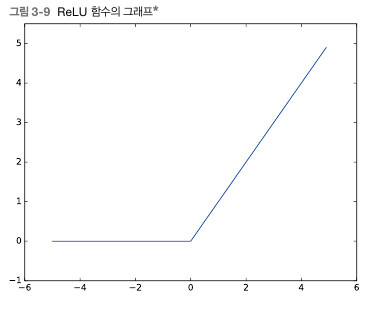

수식으로는 

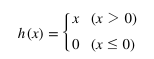

이렇게 쓸 수 있다

In [ ]:
# ReLU 함수 구현
def relu(x):
  return np.maximum(0, x)

# 넘파이의 maximum 함수는 두 입력 중 큰 값을 선택해 반환하는 함수이다.

# 다차원 배열의 계산

넘파이의 다차원 배열을 사용한 계산법을 숙달하면 신경망을 효율적으로 구현할 수 있다. 

다차원 배열도 그 기본은 '숫자의 집합'이다. `숫자가 한 줄로 늘어선 것`이나 `직사각형으로 늘어놓은 것`, `3차원으로 늘어놓은 것`이나 (더 일반화한) `N차원으로 나열하는 것`을 통틀어 다차원 배열이라고 한다.

In [ ]:
# 1차원 배열
import numpy as np
A = np.array([1,2,3,4])
print(A)            # A 배열 출력
print(np.ndim(A))   # A 배열 차원 수 출력
print(A.shape)      # A 배열 형상 출력
print(A.shape[0])   # A 배열의 열 수 출력(1 입력시 행 수 출력)

[1 2 3 4]
1
(4,)
4


In [ ]:
# 2차원 배열
B = np.array([[1,2], [3,4], [5,6]])
print(B)
print(np.ndim(B))
print(B.shape)
# 2차원 배열에서 예로 3x2 배열이 있다고 했을때, 
# 배열의 처음 차원에는 원소가 3개, 다음 차원에는 원소가 2개 있다는 뜻이다

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


## 행렬의 곱 계산하기

2x2 행렬의 경우, 곱은 아래의 그림처럼 계산한다

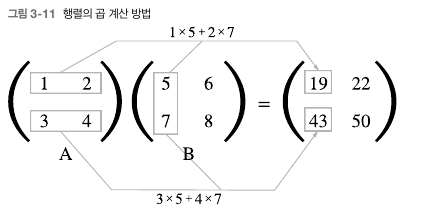

그림에서처럼 행렬 곱은 `왼쪽 행렬의 행(가로)와 오른쪽 행렬의 열(세로)을 원소별로 곱하고 그 값들을 더해서 계산`한다. 그리고 그 계산 결과가 새로운 다차원 배열의 원소가 된다.

예를 들어 A의 1행과 B의 1열을 곱한 값은 결과 행렬의 1행 1번째 원소가 되고, A의 2행과 B의 1열을 곱한 결과는 2행 1번째 원소가 된다.

In [ ]:
A = np.array([[1,2], [3,4]])
print(A.shape)
B = np.array([[5,6], [7,8]])
print(B.shape)
print(np.dot(A, B)) # np.dot()은 두 행렬의 곱을 계산해주는 함수다.

(2, 2)
(2, 2)
[[19 22]
 [43 50]]
